# Artificial Neural Networks (ANN)

## 1. Introduction to Artificial Neural Networks (ANN)

Artificial Neural Networks (ANN) are computational models inspired by the human brain's neural networks. They are used to recognize patterns and solve complex problems. ANNs have a wide range of applications, including image and speech recognition, medical diagnosis, and financial forecasting.


In [2]:
!pip install tensorflow

  Obtaining dependency information for tensorflow from https://files.pythonhosted.org/packages/1f/97/dec9dfa95cfbee631adffbeb0b7eda51ddc93a5f7e8aa8f4d95dde59e69e/tensorflow-2.16.2-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for tensorflow-intel==2.16.2 from https://files.pythonhosted.org/packages/46/87/c3e4e9fe7c630f38a6984afdd1d4ed531ef9c74dc66b86f46f6bdd89d608/tensorflow_intel-2.16.2-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for absl-py>=1.0.0 from https://files.pythonhosted.org/packages/a2/ad/e0d3c824784ff121c03cc031f944bc7e139a8f1870ffd2845cc2dd76f6c4/absl_py-2.1.0-py3-none-any.whl.metadata
  Obtaining dependency information for astunparse>=1.6.0 from https://files.pythonhosted.org/packages/2b/03/13dde6512ad7b4557eb792fbcf0c653af6076b81e5941d36ec61f7ce6028/astunparse-1.6.3-py2.py3-none-any.whl.metadata
  Obtaining dependency information for flatbuffers>=23.5.26 from https://files.pythonhosted.org/packages/41/f0/7e988a019bc54b2db

In [3]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

## 2. Basic Concepts of ANN

### Neurons and Activation Functions

A neuron is the basic unit of an ANN. It receives inputs, processes them, and produces an output. The processing is done using an activation function, which introduces non-linearity into the model. Common activation functions include:

- **Sigmoid:** $\sigma(x) = \frac{1}{1 + e^{-x}}$
- **ReLU (Rectified Linear Unit):** $\text{ReLU}(x) = \max(0, x)$
- **Tanh:** $\tanh(x) = \frac{e^x - e^{-x}}{e^x + e^{-x}}$

In [ ]:
# 2. Basic Concepts of ANN
# Example of activation functions
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def relu(x):
    return np.maximum(0, x)

def tanh(x):
    return np.tanh(x)

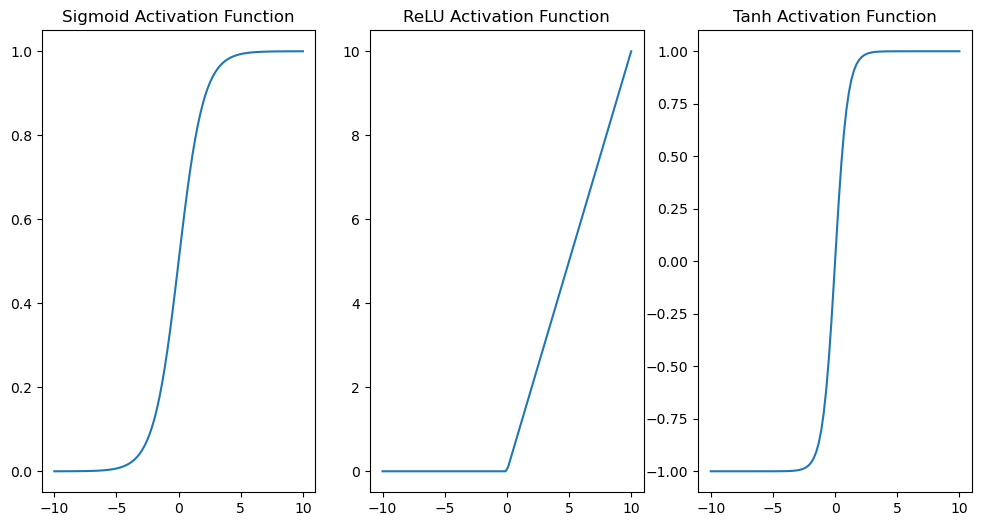

In [5]:
# Visualization of activation functions
x = np.linspace(-10, 10, 100)
plt.figure(figsize=(12, 6))
plt.subplot(1, 3, 1)
plt.plot(x, sigmoid(x))
plt.title('Sigmoid Activation Function')
plt.subplot(1, 3, 2)
plt.plot(x, relu(x))
plt.title('ReLU Activation Function')
plt.subplot(1, 3, 3)
plt.plot(x, tanh(x))
plt.title('Tanh Activation Function')
plt.show()

## 3. Training of ANN

### Loss Function

The loss function measures the difference between the predicted output and the actual output. A common loss function for classification problems is categorical cross-entropy.

### Backpropagation and Optimization

Backpropagation is the process of calculating gradients of the loss function with respect to the network's weights. These gradients are used to update the weights using an optimization algorithm, such as gradient descent.

In [6]:
# 3. Training of ANN
# Example of loss function (MSE)
def mean_squared_error(y_true, y_pred):
    return np.mean((y_true - y_pred)**2)

### Architecture of a Neural Network

A neural network is composed of layers of neurons:
- **Input Layer:** Receives the input data.
- **Hidden Layers:** Perform intermediate computations and feature extraction.
- **Output Layer:** Produces the final output.

### Forward Propagation

Forward propagation is the process of passing input data through the network to obtain an output. It involves calculating the weighted sum of inputs and applying the activation function.


In [7]:
# Example of forward propagation
def forward_propagation(X, weights, biases, activation_function):
    z = np.dot(X, weights) + biases
    if activation_function == 'sigmoid':
        return sigmoid(z)
    elif activation_function == 'relu':
        return relu(z)
    elif activation_function == 'tanh':
        return tanh(z)
    else:
        raise ValueError("Unsupported activation function")


In [8]:
# 4. Implementation in Python with Keras
# Load the MNIST dataset
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Preprocess the data
train_images = train_images.reshape((60000, 28 * 28)).astype('float32') / 255
test_images = test_images.reshape((10000, 28 * 28)).astype('float32') / 255
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [9]:
# Create the model with regularization techniques
model = Sequential()
model.add(Flatten(input_shape=(28 * 28,)))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))  # Add Dropout for regularization
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

C:\Users\David Velazco\anaconda3\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [10]:
# Compile the model
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(train_images, train_labels, epochs=10, batch_size=128, validation_split=0.2)

Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.8059 - loss: 0.6107 - val_accuracy: 0.9565 - val_loss: 0.1428
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9444 - loss: 0.1916 - val_accuracy: 0.9672 - val_loss: 0.1093
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9574 - loss: 0.1456 - val_accuracy: 0.9679 - val_loss: 0.1091
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.9633 - loss: 0.1219 - val_accuracy: 0.9741 - val_loss: 0.0902
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9701 - loss: 0.1053 - val_accuracy: 0.9747 - val_loss: 0.0911
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9704 - loss: 0.0977 - val_accuracy: 0.9777 - val_loss: 0.0805
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9740 - loss: 0.0835 - val_accuracy: 0.9792 - val_loss: 0.0820
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9755 - loss: 0.0817 - val_accuracy: 0

In [11]:
# 5. Evaluation and Improvement of the Model
# Evaluate the model
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Test accuracy:', test_acc)


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9798 - loss: 0.0801
Test accuracy: 0.9817000031471252


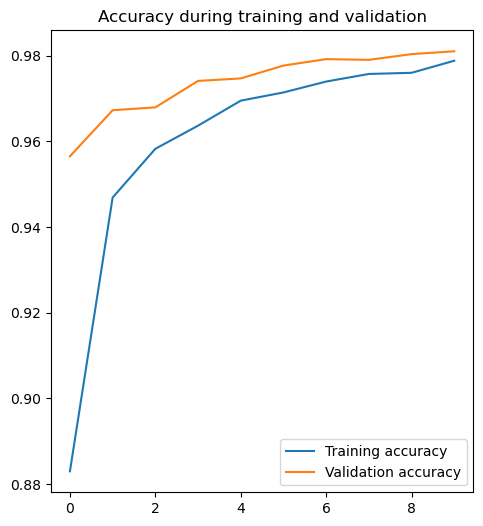

In [12]:
# Visualization of accuracy during training
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training accuracy')
plt.plot(history.history['val_accuracy'], label='Validation accuracy')
plt.title('Accuracy during training and validation')
plt.legend()

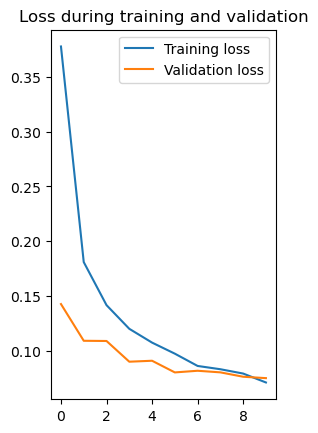

In [13]:
# Visualization of loss during training
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.title('Loss during training and validation')
plt.legend()
plt.show()

In [14]:
# Confusion matrix and classification report
pred_labels = model.predict(test_images)
pred_labels_classes = np.argmax(pred_labels, axis=1)
true_labels_classes = np.argmax(test_labels, axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


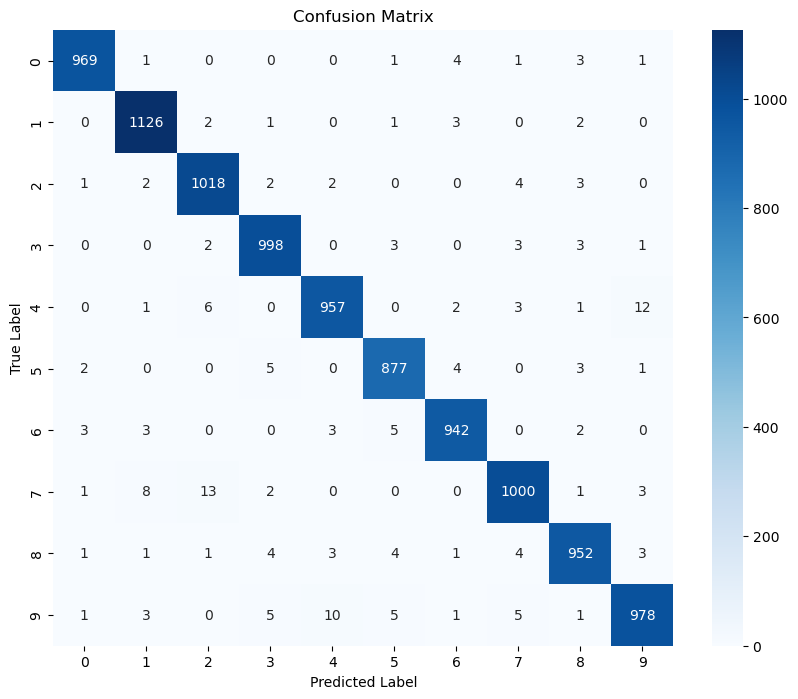

In [15]:
conf_matrix = confusion_matrix(true_labels_classes, pred_labels_classes)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

In [16]:

print('Classification Report:\n', classification_report(true_labels_classes, pred_labels_classes))


Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.98      0.99      0.99      1135
           2       0.98      0.99      0.98      1032
           3       0.98      0.99      0.98      1010
           4       0.98      0.97      0.98       982
           5       0.98      0.98      0.98       892
           6       0.98      0.98      0.98       958
           7       0.98      0.97      0.98      1028
           8       0.98      0.98      0.98       974
           9       0.98      0.97      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000

